# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Varell Anthonio
- **Email:** varell06@gmai.com
- **ID Dicoding:** Varell Anthonio

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh temperatur terhadap penggunaan sewa sepeda?
- Bagaimana pengaruh musim terhadap penggunaan sewa sepeda?
- Pada bulan apa penggunaan sewa sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
daydata = pd.read_csv("/content/drive/MyDrive/colab_notebook/dataset/day.csv")
daydata.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hourdata = pd.read_csv('/content/drive/MyDrive/colab_notebook/dataset/hour.csv')
hourdata.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
daydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
daydata.shape

(731, 16)

In [ ]:
daydata.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("duplikasi data: ", daydata.duplicated().sum())

duplikasi data:  0


In [ ]:
daydata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hourdata.shape

(17379, 17)

In [ ]:
hourdata.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("duplikasi data: ", hourdata.duplicated().sum())

duplikasi data:  0


In [ ]:
hourdata.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
#mengambil data HR
daydata['hour'] = hourdata['hr']
daydata

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,15
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,16
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,17
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,18


In [ ]:
drop_col = ['instant']

for i in daydata.columns:
  if i in drop_col:
    daydata.drop(labels=i, axis=1, inplace=True)

daydata.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [54]:
#Mengubah beberapa nama kolom dan mengganti namanya dengan kalimat yang tepat
daydata.rename(columns={
    'dteday': 'dateday',
    'yr': 'Year',
    'mnth': 'month',
    'weathersit': 'Weather_cond',
    'cnt':'count'
},inplace=True)
daydata.head()

,season,Year,month,holiday,weekday,workingday,Weather_cond,temp,atemp,hum,windspeed,casual,registered,count,hour
dateday,,,,,,,,,,,,,,,
2011-01-01,Spring,0,Jan,0,Sat,No,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
2011-01-02,Spring,0,Jan,0,Sun,No,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2011-01-03,Spring,0,Jan,0,Mon,Yes,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
2011-01-04,Spring,0,Jan,0,Tue,Yes,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
2011-01-05,Spring,0,Jan,0,Wed,Yes,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [ ]:
# Mengubah angka menjadi keterangan

# Konversi nilai untuk kolom 'Bulan' :
daydata['month'] = daydata['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Konversi nilai untuk kolom 'Season' :
daydata['season'] = daydata['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Konversi nilai untuk kolom 'Hari' :
daydata['weekday'] = daydata['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
daydata['Weather_cond'] = daydata['Weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
daydata['workingday'] = daydata['workingday'].map({
    0: 'No',
    1: 'Yes',
})

In [ ]:
daydata.head()

,dateday,season,Year,month,holiday,weekday,workingday,Weather_cond,temp,atemp,hum,windspeed,casual,registered,count,hour
0,2011-01-01,Spring,0,Jan,0,Sat,No,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2011-01-02,Spring,0,Jan,0,Sun,No,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,2011-01-03,Spring,0,Jan,0,Mon,Yes,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,2011-01-04,Spring,0,Jan,0,Tue,Yes,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,2011-01-05,Spring,0,Jan,0,Wed,Yes,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [ ]:
# Mengubah tipe data menjadi datetime
daydata['dateday'] = pd.to_datetime(daydata.dateday)

# Mengubah tipe data menjadi kategori
daydata['season'] = daydata.season.astype('category')
daydata['Year'] = daydata.Year.astype('category')
daydata['month'] = daydata.month.astype('category')
daydata['holiday'] = daydata.holiday.astype('category')
daydata['weekday'] = daydata.weekday.astype('category')
daydata['workingday'] = daydata.workingday.astype('category')
daydata['Weather_cond'] = daydata.Weather_cond.astype('category')

daydata.head()

,dateday,season,Year,month,holiday,weekday,workingday,Weather_cond,temp,atemp,hum,windspeed,casual,registered,count,hour
0,2011-01-01,Spring,0,Jan,0,Sat,No,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2011-01-02,Spring,0,Jan,0,Sun,No,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,2011-01-03,Spring,0,Jan,0,Mon,Yes,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,2011-01-04,Spring,0,Jan,0,Tue,Yes,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,2011-01-05,Spring,0,Jan,0,Wed,Yes,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [ ]:
daydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   Year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   Weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count         731 non-null    int64         
 15  hour          731 non-null    int64     

In [ ]:
daydata.Year.value_counts()

1    366
0    365
Name: Year, dtype: int64

In [ ]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi
daydata['temp'] = daydata['temp']*41
daydata['atemp'] = daydata['atemp']*50
daydata['hum'] = daydata['hum']*100
daydata['windspeed'] = daydata['windspeed']*67

In [ ]:
daydata.head()

,dateday,season,Year,month,holiday,weekday,workingday,Weather_cond,temp,atemp,hum,windspeed,casual,registered,count,hour
0,2011-01-01,Spring,0,Jan,0,Sat,No,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2011-01-02,Spring,0,Jan,0,Sun,No,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,2011-01-03,Spring,0,Jan,0,Mon,Yes,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,2011-01-04,Spring,0,Jan,0,Tue,Yes,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,2011-01-05,Spring,0,Jan,0,Wed,Yes,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


## Exploratory Data Analysis (EDA)

In [ ]:
daydata.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [ ]:
daydata.groupby(by='Weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
Weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [ ]:
daydata.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [ ]:
daydata.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [ ]:
daydata.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
No          8714  605  4330.168831
Yes         8362   22  4584.820000

In [ ]:
daydata.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [ ]:
daydata.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
Fall    35.328347  19.235847  28.958682  42.04480  12.12000  32.794920   
Spring  23.472500   2.424346  12.207650  27.43085   3.95348  14.845697   
Summer  33.141653  10.374763  22.320611  37.87895  12.51695  26.015366   
Winter  26.957500   9.054153  17.339148  30.39875  11.39565  20.776937   

            hum                      
            max      min       mean  
season                               
Fall    93.9565  36.0000  63.348206  
Spring  94.8261   0.0000  58.290291  
Summer  92.2500  25.4167  62.694833  
Winter  97.2500  33.3478  66.871917

In [ ]:
daydata.groupby(by='Year').agg({
    'windspeed': ['max', 'min', 'mean'],
})

windspeed                     
            max       min       mean
Year                                
0     34.000021  1.500244  12.823977
1     29.584721  3.125550  12.701344

In [ ]:
daydata.groupby(by='hour').agg({
    'windspeed': ['max', 'min', 'mean'],
})

windspeed                     
            max       min       mean
hour                                
0     23.541857  4.458569  13.293640
1     29.584721  5.542575  12.493871
2     27.791600  1.500244  13.790487
3     23.999400  3.042081  11.678858
4     34.000021  4.251150  11.942705
5     25.333236  2.834381  11.599007
6     25.250357  4.956834  12.789009
7     25.166339  3.167425  12.265349
8     24.250650  3.125550  12.846563
9     25.083661  6.167631  15.068411
10    27.833743  3.834075  13.928438
11    20.410009  4.625513  12.176819
12    20.375236  3.917544  11.537595
13    28.250014  4.000181  12.650496
14    22.834136  3.042356  12.072270
15    28.292425  3.875669  12.943012
16    19.083543  4.292744  12.547772
17    23.044181  6.208669  13.098211
18    23.500518  4.917519  12.983126
19    25.917007  4.417256  13.411763
20    23.667214  4.458294  12.649851
21    27.999836  4.251150  11.842426
22    23.084582  4.876206  13.058099
23    27.417204  4.084206  13.077625

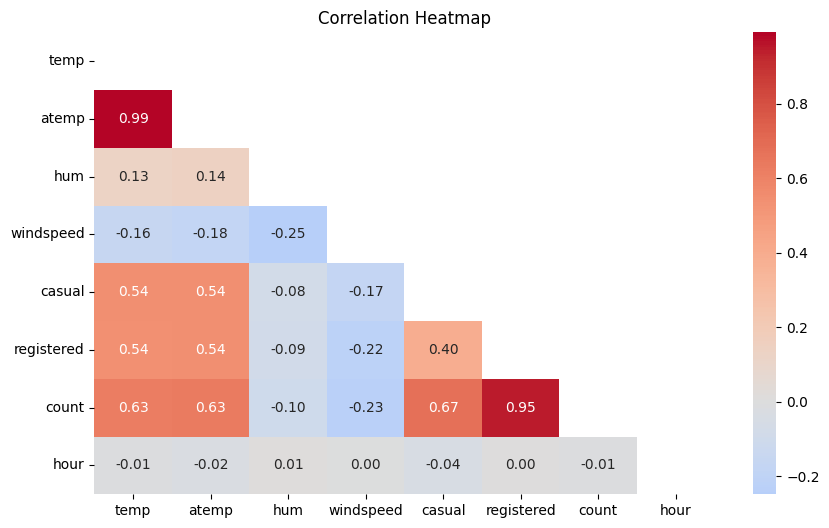

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = daydata.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Visualization & Explanatory Analysis

Text(0.5, 1.0, 'Temperature vs Total Of Riders')

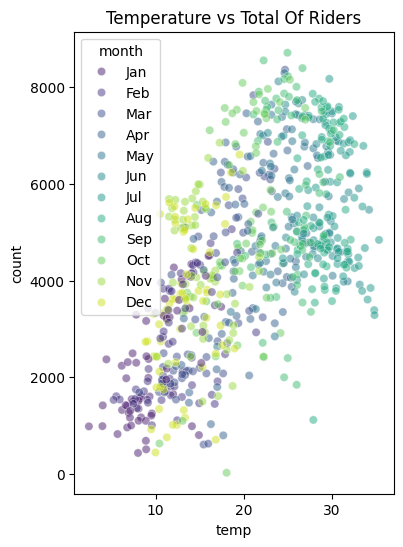

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=daydata,
    alpha=0.5,
    palette='viridis',
    hue='month'
)
plt.title('Temperature vs Total Of Riders')


<ipython-input-38-610a3cc9a543>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-38-610a3cc9a543>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


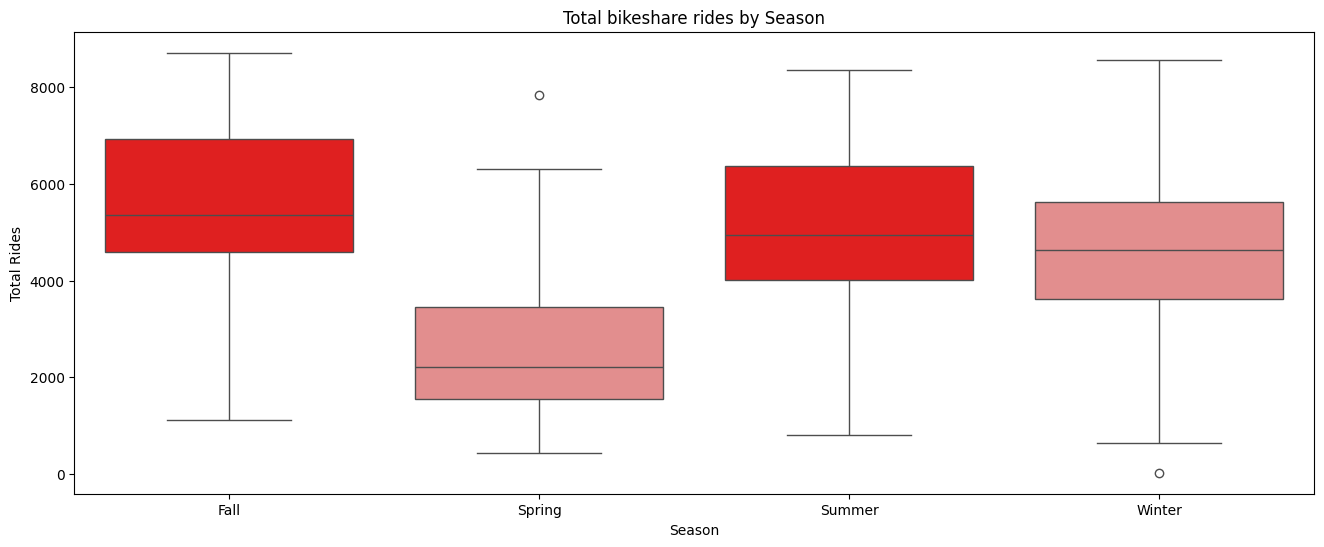

In [ ]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="count",
    data=daydata,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Season")

# Show the plot
plt.show()

<ipython-input-39-7b35bbc34f86>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


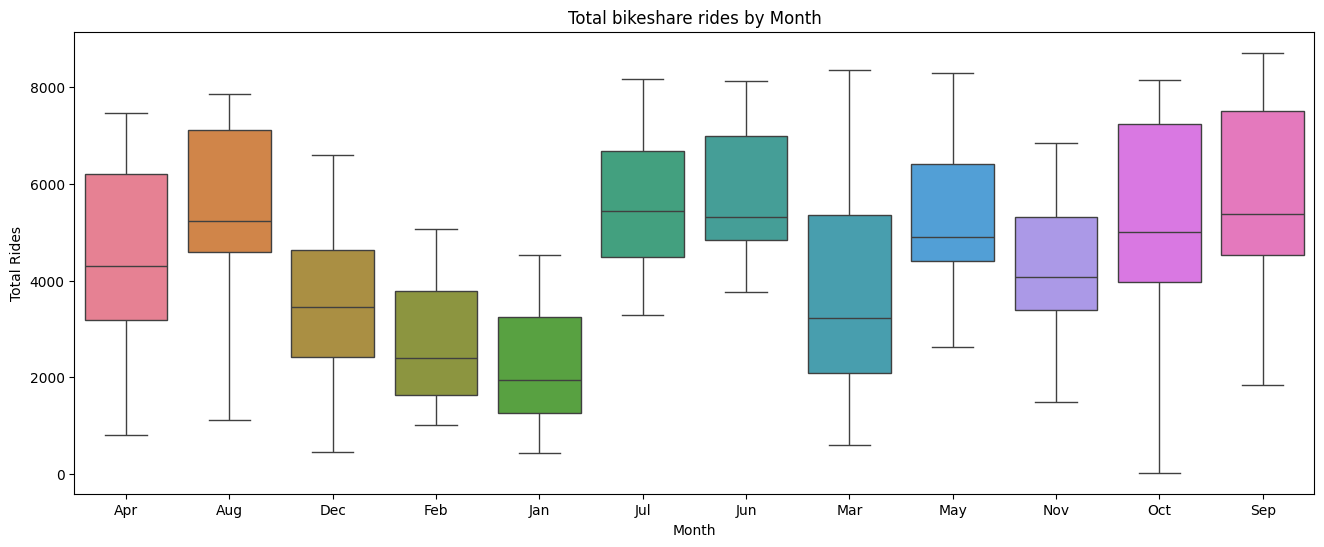

In [ ]:
plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="month",
    y="count",
    data=daydata,
    palette=sns.color_palette("husl", 12)
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Month")

# Show the plot
plt.show()

In [ ]:
daydata.to_csv("day.csv")


### Pertanyaan 1:

- Bagaimana pengaruh temperatur terhadap penggunaan sewa sepeda?

### Pertanyaan 2:

- Bagaimana pengaruh musim terhadap pengunaan sewa sepeda?

### Pertanyaan 3:

- Pada bulan apa penggunaan sewa sepeda paling tinggi?

## Conclusion

1. Temperatur memiliki korelasi positif yang kuat dengan jumlah penggunaan sepeda. Jika temperatur meningkat, penggunaan sewa sepeda cenderung meningkat.

2. Dari grafik yang telah kita dapatkan diatas, dapat dilihat bahwa penggunaan sewa sepeda paling banyak terjadi pada musim fall/musim gugur.

3.  Dari grafik yang telah kita dapatkan diatas, dapat dilihat bahwa penggunaan sewa sepeda paling tinggi adalah pada bulan september.

In [ ]:
hour.to_csv("hour_cleaned.csv", index=False)
